In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [3]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.7692 - loss: 0.6515 - val_accuracy: 0.8660 - val_loss: 0.3725
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.8803 - loss: 0.3368 - val_accuracy: 0.8867 - val_loss: 0.3132
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.8982 - loss: 0.2783 - val_accuracy: 0.8983 - val_loss: 0.2800
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9106 - loss: 0.2397 - val_accuracy: 0.8812 - val_loss: 0.2987
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9193 - loss: 0.2155 - val_accuracy: 0.9015 - val_loss: 0.2650
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9281 - loss: 0.1946 - val_accuracy: 0.9067 - val_loss: 0.2570
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9333 - loss: 0.1777 - val_accuracy: 0.9088 - val_loss: 0.2558
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 25ms/step - accuracy: 0.9388 -

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9119 - loss: 0.2950

Test accuracy: 0.9143


In [9]:
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


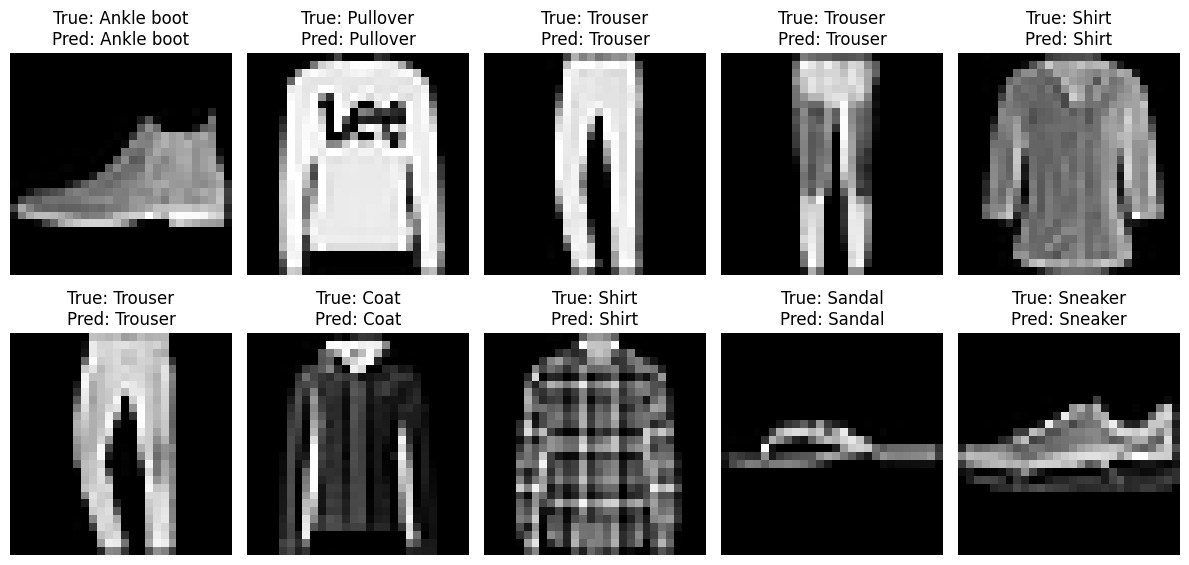

In [10]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()